<a href="https://colab.research.google.com/github/fader2077/INPEPENDENT_STUDY/blob/main/Keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第8章：電腦視覺的深度學習簡介

##8-1 卷積神經網路(CNN)

####程式 8.1 初始化一個小型卷積神經網路(convnet)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

####程式 8.2 顯示模型架構

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

####程式 8.3 用MNIST影像訓練卷積神經網路

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 4ms/step - loss: 0.1719 - accuracy: 0.9463
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0457 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0177 - accuracy: 0.9945


####程式 8.4 **評估卷積神經網路**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9918
Test accuracy: 0.992


###8-1-2 最大池化(MaxPooling)操作

####程式 8.5 不使用池化層的卷積神經網路

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

##8-2 以少量資料集從頭訓練一個卷積神經網路

###8-2-2 下載資料

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fader2077","key":"5ea3fa4a8d0a2b2f420ee85d0e67ee2e"}'}

In [24]:
!rm -rf root/kaggle/

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:05<00:00, 146MB/s]
100% 812M/812M [00:05<00:00, 165MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [5]:
!unzip -qq train.zip

####程式8.6 複製圖片到訓練集、驗證集和測試集

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                    dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

###8-2-3 建立神經網路

####程式 8.7 用來分類狗和貓的小型卷積神經網路

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

####程式 8.8 配置模型以進行訓練

In [9]:
model.compile(loss="binary_crossentropy",
       optimizer="rmsprop",
       metrics=["accuracy"])

###8-2-4 資料預處理

####程式 8.9 使用image_dataset_from_directory()來讀取影像



In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [12]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [13]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [14]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


####程式 8.10 顯示train_dataset所產生的資料和標籤之shape

In [15]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


####程式 8.11 使用Dataset物件訓練模型

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 19s 79ms/step - loss: 0.7124 - accuracy: 0.5245 - val_loss: 0.6907 - val_accuracy: 0.6150
Epoch 2/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6934 - accuracy: 0.5280 - val_loss: 0.6883 - val_accuracy: 0.5370
Epoch 3/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6919 - accuracy: 0.5545 - val_loss: 0.6653 - val_accuracy: 0.6410
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6620 - accuracy: 0.6050 - val_loss: 0.7377 - val_accuracy: 0.5360
Epoch 5/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6232 - accuracy: 0.6525 - val_loss: 0.6055 - val_accuracy: 0.6620
Epoch 6/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5819 - accuracy: 0.6935 - val_loss: 0.6264 - val_accuracy: 0.6730
Epoch 7/30
63/63 [==============================] - 5s 67ms/step - loss: 0.5673 - accuracy: 0.7085 - val_loss: 0.5862 - val_accuracy: 0.6890
Epoch 8/30
6

####程式 8.12 繪製訓練過程中的損失值和準確度曲線

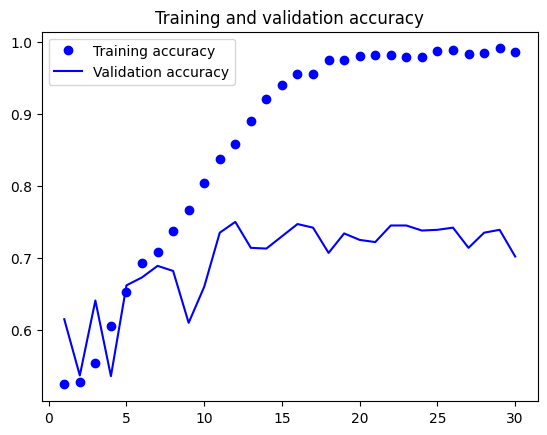

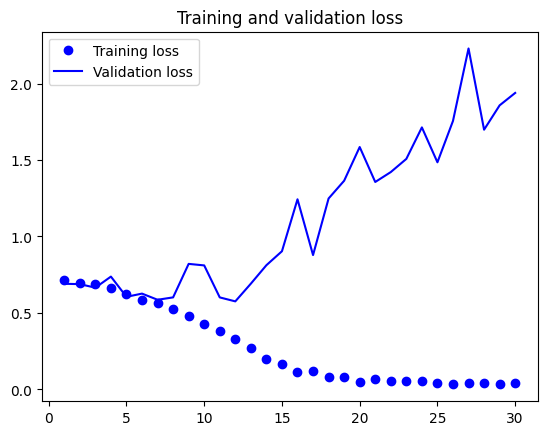

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

####程式 8.13 使用測試集評估模型

In [18]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 46ms/step - loss: 0.5700 - accuracy: 0.7385
Test accuracy: 0.738


###8-2-5 使用資料擴增法(data augmentation）

####程式 8.14 定義要加入影像分類模型的資料擴增層

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

####程式 8.15 顯示一些隨機擴增的訓練影像

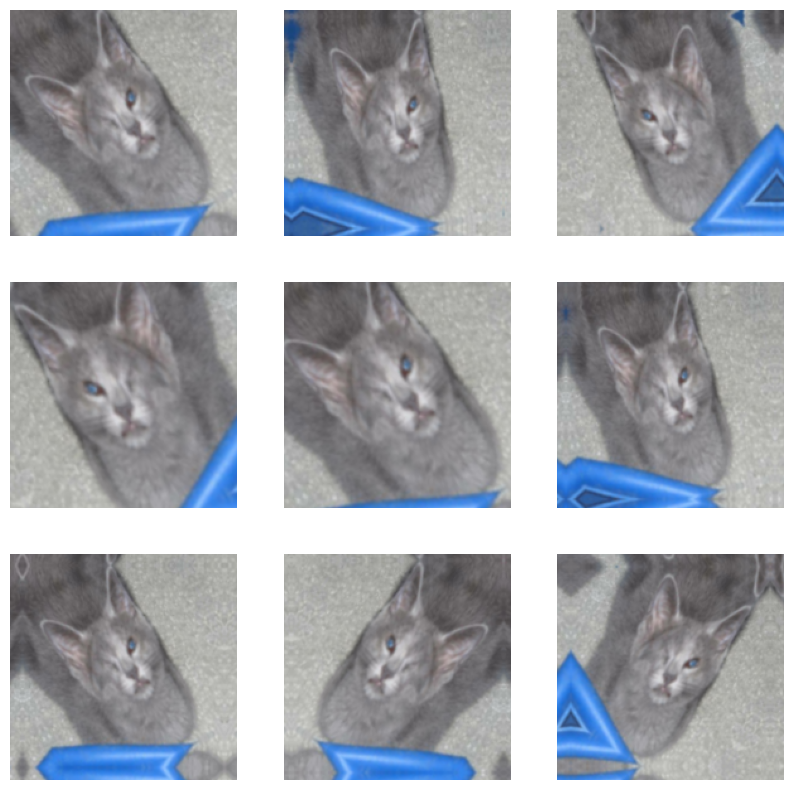

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

####程式 8.16 定義包含了影像擴增和Dropout層的新卷積神經網路

In [21]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
       optimizer="rmsprop",
       metrics=["accuracy"])

####程式 8.17 訓練常規化後的卷積神經網路

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 69ms/step - loss: 0.6995 - accuracy: 0.5190 - val_loss: 0.6887 - val_accuracy: 0.5230
Epoch 2/100
63/63 [==============================] - 5s 80ms/step - loss: 0.6926 - accuracy: 0.5435 - val_loss: 0.6912 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 4s 68ms/step - loss: 0.6873 - accuracy: 0.5615 - val_loss: 0.6718 - val_accuracy: 0.5640
Epoch 4/100
63/63 [==============================] - 5s 67ms/step - loss: 0.6675 - accuracy: 0.6015 - val_loss: 0.6455 - val_accuracy: 0.6200
Epoch 5/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6489 - accuracy: 0.6360 - val_loss: 0.6332 - val_accuracy: 0.6170
Epoch 6/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6240 - accuracy: 0.6570 - val_loss: 0.6261 - val_accuracy: 0.6400
Epoch 7/100
63/63 [==============================] - 5s 83ms/step - loss: 0.6064 - accuracy: 0.6745 - val_loss: 0.6442 - val_accuracy: 0.6280
Epoch 

####程式 8.18 使用測試集來評估模型

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 33ms/step - loss: 0.4571 - accuracy: 0.8245
Test accuracy: 0.825


##8-3 利用預先訓練好的模型

###8-3-1 特徵萃取

####程式 8.19 建立VGG16的convolutional base

In [24]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

####程式 5.20 萃取VGG16的特徵和對應標籤

In [26]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 21ms/step


In [27]:
train_features.shape

(2000, 5, 5, 512)

####程式 8.21 建立和訓練密集連接的分類器

In [28]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 16.3445 - accuracy: 0.9295 - val_loss: 3.4538 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 3.3203 - accuracy: 0.9750 - val_loss: 4.4250 - val_accuracy: 0.9680
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0335 - accuracy: 0.9905 - val_loss: 2.8365 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6710 - accuracy: 0.9830 - val_loss: 6.1269 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9964 - accuracy: 0.9915 - val_loss: 4.9747 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2842 - accuracy: 0.9910 - val_loss: 3.6847 - val_accuracy: 0.9790
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4930 - accuracy: 0.9950 - val_loss: 4.2144 - val_accuracy: 0.9810
Epoch 8/20
63/63 [

####程式 8.22 繪製結果

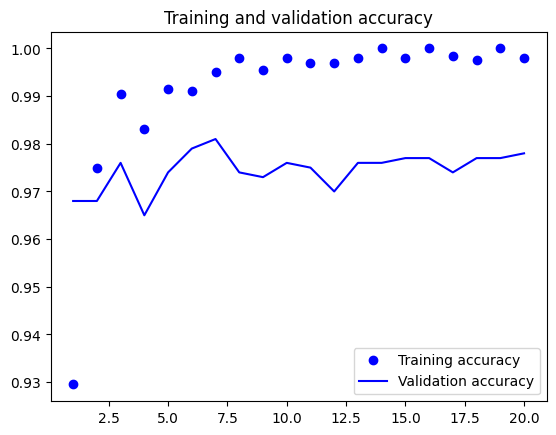

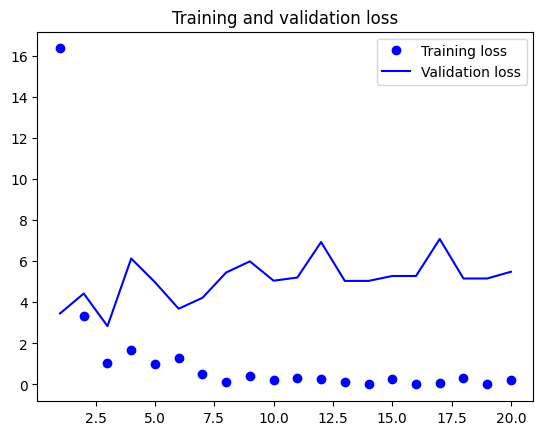

In [29]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

####程式 8.23 建立並凍結VGG16的convolutional base

In [30]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

####程式 8.24 列印凍結前後的可訓練權重串列

In [31]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [32]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


####程式 8.25 新增一個資料擴增模組和分類器

In [33]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
       optimizer="rmsprop",
       metrics=["accuracy"])

In [34]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 155ms/step - loss: 21.6867 - accuracy: 0.8910 - val_loss: 3.2374 - val_accuracy: 0.9710
Epoch 2/50
63/63 [==============================] - 10s 153ms/step - loss: 7.9085 - accuracy: 0.9440 - val_loss: 4.9919 - val_accuracy: 0.9640
Epoch 3/50
63/63 [==============================] - 10s 160ms/step - loss: 5.9283 - accuracy: 0.9520 - val_loss: 4.3113 - val_accuracy: 0.9700
Epoch 4/50
63/63 [==============================] - 10s 155ms/step - loss: 5.5447 - accuracy: 0.9570 - val_loss: 3.3907 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 10s 152ms/step - loss: 3.9232 - accuracy: 0.9695 - val_loss: 5.4419 - val_accuracy: 0.9660
Epoch 6/50
63/63 [==============================] - 10s 153ms/step - loss: 3.8257 - accuracy: 0.9650 - val_loss: 2.3878 - val_accuracy: 0.9800
Epoch 7/50
63/63 [==============================] - 10s 150ms/step - loss: 3.1556 - accuracy: 0.9755 - val_loss: 2.7121 - val_accuracy: 0.977

####程式 8.26 使用測試集評估模型

In [35]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 96ms/step - loss: 2.3380 - accuracy: 0.9760
Test accuracy: 0.976


###8-3-2 微調

In [36]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

####程式 8.27 將所有層凍結到指定層為止

In [37]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

####程式 8.28 微調神經網路

In [38]:
model.compile(loss="binary_crossentropy",
       optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
       metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 176ms/step - loss: 0.4836 - accuracy: 0.9840 - val_loss: 1.2064 - val_accuracy: 0.9850
Epoch 2/30
63/63 [==============================] - 11s 170ms/step - loss: 0.2754 - accuracy: 0.9905 - val_loss: 3.0360 - val_accuracy: 0.9650
Epoch 3/30
63/63 [==============================] - 11s 171ms/step - loss: 0.2662 - accuracy: 0.9940 - val_loss: 1.6229 - val_accuracy: 0.9750
Epoch 4/30
63/63 [==============================] - 11s 169ms/step - loss: 0.3842 - accuracy: 0.9930 - val_loss: 1.2455 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 11s 170ms/step - loss: 0.2845 - accuracy: 0.9910 - val_loss: 1.5801 - val_accuracy: 0.9850
Epoch 6/30
63/63 [==============================] - 12s 196ms/step - loss: 0.3687 - accuracy: 0.9905 - val_loss: 1.5884 - val_accuracy: 0.9850
Epoch 7/30
63/63 [==============================] - 11s 165ms/step - loss: 0.0949 - accuracy: 0.9945 - val_loss: 1.2515 - val_accuracy: 0.9850

In [39]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 95ms/step - loss: 1.8987 - accuracy: 0.9760
Test accuracy: 0.976
